<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-data,-cleaning-and-filling-missing-values" data-toc-modified-id="Loading-data,-cleaning-and-filling-missing-values-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading data, cleaning and filling missing values</a></span></li><li><span><a href="#Data-Aggregation-with-groupby()" data-toc-modified-id="Data-Aggregation-with-groupby()-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Aggregation with groupby()</a></span></li></ul></div>

Data Source: https://www.kaggle.com/abcsds/pokemon

In [1]:
# import required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data, cleaning and filling missing values 

In [2]:
# read csv file
pokemon = pd.read_csv('pokemon.csv')

In [3]:
# show top 5 rows of dataset
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# show summary statistics
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
# show data types for all columns
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [6]:
# rename columns
pokemon.rename(columns={'Type 1': 'Type_1',
                        'Type 2': 'Type_2',
                        'Sp. Atk': 'Sp_Atk',
                        'Sp. Def': 'Sp_Def'},
               inplace=True)

In [7]:
pokemon.columns

Index(['#', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
# convert columns to desired data types
pokemon['Name'] = pokemon['Name'].astype('string')
pokemon['Type_1'] = pokemon['Type_1'].astype('category')
pokemon['Type_2'] = pokemon['Type_2'].astype('category')
pokemon['Generation'] = pokemon['Generation'].astype('category')

In [9]:
# check dtypes again
pokemon.dtypes

#                int64
Name            string
Type_1        category
Type_2        category
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp_Atk           int64
Sp_Def           int64
Speed            int64
Generation    category
Legendary         bool
dtype: object

In [10]:
pokemon.isnull().any()

#             False
Name          False
Type_1        False
Type_2         True
Total         False
HP            False
Attack        False
Defense       False
Sp_Atk        False
Sp_Def        False
Speed         False
Generation    False
Legendary     False
dtype: bool

In [11]:
pokemon['Type_2'] = np.where(pokemon['Type_2'].isnull(), pokemon['Type_1'],
         pokemon['Type_2'])

In [12]:
pokemon.isnull().any()

#             False
Name          False
Type_1        False
Type_2        False
Total         False
HP            False
Attack        False
Defense       False
Sp_Atk        False
Sp_Def        False
Speed         False
Generation    False
Legendary     False
dtype: bool

# Data Aggregation with groupby()

split-apply-combine is the name of the game when it comes to group operations. 

Data is first split into groups based on grouping keys provided to the groupby() function. Then the aggregation function is applied to each group separately. Finally the results of the data aggregations applied to each group is combined to return the final result. 

The grouping key can be in various forms: 
- a list or array
- a dictionary or Series
- one or more columns in a DataFrame
- a lambda function or user-defined function


Now back to our pokemon dataset; I converted the 'Type_1', 'Type_2', and 'Generation' columns to the `category` data type to use them as grouping keys. The numerical columns that are the focus of our aggregation functions are as follows: 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'. 

'Type_1' can be considered to be the main Pokemon type while 'Type_2' is more likely the sub-type. For most grouping operations I will use 'Type_1' as the grouping key.


In [13]:
# create GroupBy object with 'Type_1' grouping key
grouped_main = pokemon.groupby('Type_1')

In [14]:
type(grouped_main)

pandas.core.groupby.generic.DataFrameGroupBy

In [15]:
# number of pokemon in each group
grouped_main.size()

Type_1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
dtype: int64

In [16]:
grouped_main.get_group('Fire')[:5]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [17]:
grouped_main.describe()

#                                                               \
          count        mean         std    min     25%    50%     75%    max   
Type_1                                                                         
Bug        69.0  334.492754  210.445160   10.0  168.00  291.0  543.00  666.0   
Dark       31.0  461.354839  176.022072  197.0  282.00  509.0  627.00  717.0   
Dragon     32.0  474.375000  170.190169  147.0  373.00  443.5  643.25  718.0   
Electric   44.0  363.500000  202.731063   25.0  179.75  403.5  489.75  702.0   
Fairy      17.0  449.529412  271.983942   35.0  176.00  669.0  683.00  716.0   
Fighting   27.0  363.851852  218.565200   56.0  171.50  308.0  536.00  701.0   
Fire       52.0  327.403846  226.262840    4.0  143.50  289.5  513.25  721.0   
Flying      4.0  677.750000   42.437209  641.0  641.00  677.5  714.25  715.0   
Ghost      32.0  486.500000  209.189218   92.0  354.75  487.0  709.25  711.0   
Grass      70.0  344.871429  200.264385    1.0  187.25  372.0  496.75  673.0   
Ground     32.0  356.281250  204.899855   27.0  183.25  363.5  535.25  645.0   
Ice        24.0  423.541667  175.465834  124.0  330.25  371.5  583.25  713.0   
Normal     98.0  319.173469  193.854820   16.0  161.25  296.5  483.00  676.0   
Poison     28.0  251.785714  228.801767   23.0   33.75  139.5  451.25  691.0   
Psychic    57.0  380.807018  194.600455   63.0  201.00  386.0  528.00  720.0   
Rock       44.0  392.727273  213.746140   74.0  230.75  362.5  566.25  719.0   
Steel      27.0  442.851852  164.847180  208.0  305.50  379.0  600.50  707.0   
Water     112.0  303.089286  188.440807    7.0  130.00  275.0  456.25  693.0   

          Total              ...  Sp_Def         Speed                         \
          count        mean  ...     75%    max  count        mean        std   
Type_1                       ...                                                
Bug        69.0  378.927536  ...   80.00  230.0   69.0   61.681159  33.227599   
Dark       31.0  445.741935  ...   87.50  130.0   31.0   76.161290  27.768203   
Dragon     32.0  550.531250  ...  105.00  150.0   32.0   83.031250  23.239961   
Electric   44.0  443.409091  ...   90.00  110.0   44.0   84.500000  26.691607   
Fairy      17.0  413.176471  ...   98.00  154.0   17.0   48.588235  23.305200   
Fighting   27.0  416.444444  ...   75.00  110.0   27.0   66.074074  26.054567   
Fire       52.0  458.076923  ...   85.00  154.0   52.0   74.442308  25.245783   
Flying      4.0  485.000000  ...   82.50   90.0    4.0  102.500000  32.098806   
Ghost      32.0  439.562500  ...   91.25  135.0   32.0   64.343750  28.020280   
Grass      70.0  421.142857  ...   85.00  129.0   70.0   61.928571  28.506456   
Ground     32.0  437.500000  ...   80.00  120.0   32.0   63.906250  27.450083   
Ice        24.0  433.458333  ...   91.25  200.0   24.0   63.458333  24.498410   
Normal     98.0  401.683673  ...   75.00  135.0   98.0   71.551020  28.406157   
Poison     28.0  399.142857  ...   76.00  123.0   28.0   63.571429  22.631392   
Psychic    57.0  475.947368  ...  110.00  160.0   57.0   81.491228  37.335412   
Rock       44.0  453.750000  ...   90.50  150.0   44.0   55.909091  29.903580   
Steel      27.0  487.703704  ...   95.00  150.0   27.0   55.259259  25.846578   
Water     112.0  430.455357  ...   89.25  160.0  112.0   65.964286  23.019353   

                                             
           min    25%    50%     75%    max  
Type_1                                       
Bug        5.0  36.00   60.0   85.00  160.0  
Dark      20.0  59.00   70.0   98.50  125.0  
Dragon    40.0  65.25   90.0   97.75  120.0  
Electric  35.0  60.00   88.0  101.50  140.0  
Fairy     15.0  30.00   45.0   60.00   99.0  
Fighting  25.0  45.00   60.0   86.00  118.0  
Fire      20.0  60.00   78.5   96.25  126.0  
Flying    55.0  97.00  116.0  121.50  123.0  
Ghost     20.0  44.00   60.5   84.25  130.0  
Grass     10.0  40.00   58.5   80.00  145.0  
Ground    10.0  40.00   65.0   90

In [18]:
grouped_main.nth(3)

,#,Name,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
Type_1,,,,,,,,,,,,
Bug,13,Weedle,Poison,195,40,35,30,20,20,50,1,False
Dark,228,Houndour,Fire,330,45,60,30,80,50,65,2,False
Dragon,334,Altaria,Flying,490,75,70,90,70,105,80,3,False
Electric,82,Magneton,Steel,465,50,60,95,120,70,70,1,False
Fairy,175,Togepi,Fairy,245,35,20,65,40,65,20,2,False
Fighting,67,Machoke,Fighting,405,80,100,70,50,60,45,1,False
Fire,6,CharizardMega Charizard X,Dragon,634,78,130,111,130,85,100,1,False
Flying,715,Noivern,Dragon,535,85,70,80,97,80,123,6,False
Ghost,94,GengarMega Gengar,Poison,600,60,65,80,170,95,130,1,False


In [19]:
# which Pokemon type has the highest average HP
grouped_main['HP'].mean().sort_values(ascending=False)

Type_1
Dragon      83.312500
Normal      77.275510
Fairy       74.117647
Ground      73.781250
Water       72.062500
Ice         72.000000
Flying      70.750000
Psychic     70.631579
Fire        69.903846
Fighting    69.851852
Grass       67.271429
Poison      67.250000
Dark        66.806452
Rock        65.363636
Steel       65.222222
Ghost       64.437500
Electric    59.795455
Bug         56.884058
Name: HP, dtype: float64

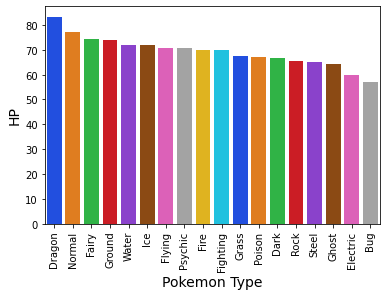

In [20]:
fig, ax = plt.subplots(1, 1)

group_obj = grouped_main['HP'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=pokemon,
            x='Type_1',
            y='HP', palette='bright',
            ax=ax, ci=None,
            order=group_obj['Type_1'])

xlabels = ax.get_xticklabels()
ax.set_xticklabels(rotation=90, labels=xlabels)
ax.set_xlabel('Pokemon Type', fontsize=14),
ax.set_ylabel('HP', fontsize=14);

Clearly the Dragon type has the highest HP and wins this round.

Next, which Pokemon is the fastest on average?

In [21]:
grouped_main['Speed'].mean().sort_values(ascending=False)

Type_1
Flying      102.500000
Electric     84.500000
Dragon       83.031250
Psychic      81.491228
Dark         76.161290
Fire         74.442308
Normal       71.551020
Fighting     66.074074
Water        65.964286
Ghost        64.343750
Ground       63.906250
Poison       63.571429
Ice          63.458333
Grass        61.928571
Bug          61.681159
Rock         55.909091
Steel        55.259259
Fairy        48.588235
Name: Speed, dtype: float64

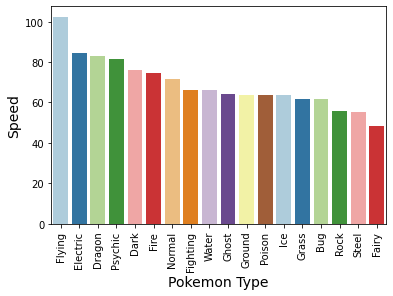

In [22]:
fig, ax = plt.subplots(1, 1)

group_obj = grouped_main['Speed'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=pokemon,
            x='Type_1',
            y='Speed', palette='Paired',
            ax=ax, ci=None,
            order=group_obj['Type_1'])

xlabels = ax.get_xticklabels()
ax.set_xticklabels(rotation=90, labels=xlabels)
ax.set_xlabel('Pokemon Type', fontsize=14),
ax.set_ylabel('Speed', fontsize=14);

Hmm I didn't expect the Flying type to be the fastest honestly. Round 2 goes to the Flying type pokemon!

Next, which pokemon has the best attacks?

In [23]:
grouped_main['Attack'].mean().sort_values(ascending=False)

Type_1
Dragon      112.125000
Fighting     96.777778
Ground       95.750000
Rock         92.863636
Steel        92.703704
Dark         88.387097
Fire         84.769231
Flying       78.750000
Poison       74.678571
Water        74.151786
Ghost        73.781250
Normal       73.469388
Grass        73.214286
Ice          72.750000
Psychic      71.456140
Bug          70.971014
Electric     69.090909
Fairy        61.529412
Name: Attack, dtype: float64

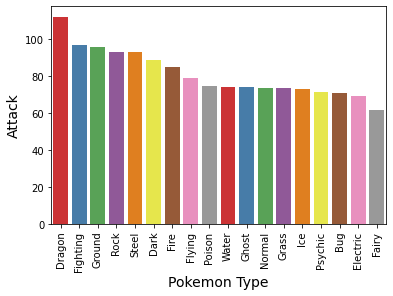

In [24]:
fig, ax = plt.subplots(1, 1)

group_obj = grouped_main['Attack'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=pokemon,
            x='Type_1',
            y='Attack', palette='Set1',
            ax=ax, ci=None,
            order=group_obj['Type_1'])

xlabels = ax.get_xticklabels()
ax.set_xticklabels(rotation=90, labels=xlabels)
ax.set_xlabel('Pokemon Type', fontsize=14),
ax.set_ylabel('Attack', fontsize=14);

In [25]:
# pokemon type with best defense?
grouped_main['Defense'].mean().sort_values(ascending=False)

Type_1
Steel       126.370370
Rock        100.795455
Dragon       86.375000
Ground       84.843750
Ghost        81.187500
Water        72.946429
Ice          71.416667
Grass        70.800000
Bug          70.724638
Dark         70.225806
Poison       68.821429
Fire         67.769231
Psychic      67.684211
Electric     66.295455
Flying       66.250000
Fighting     65.925926
Fairy        65.705882
Normal       59.846939
Name: Defense, dtype: float64

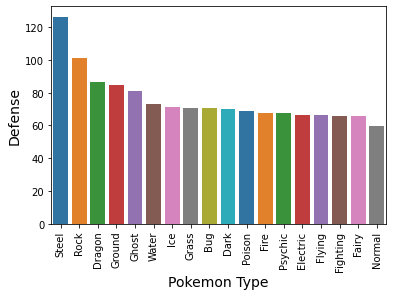

In [26]:
fig, ax = plt.subplots(1, 1)

group_obj = grouped_main['Defense'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=pokemon,
            x='Type_1',
            y='Defense', palette='tab10',
            ax=ax, ci=None,
            order=group_obj['Type_1'])

xlabels = ax.get_xticklabels()
ax.set_xticklabels(rotation=90, labels=xlabels)
ax.set_xlabel('Pokemon Type', fontsize=14),
ax.set_ylabel('Defense', fontsize=14);

In [27]:
# now the most powerful overall
grouped_main['Total'].mean().sort_values(ascending=False)

Type_1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

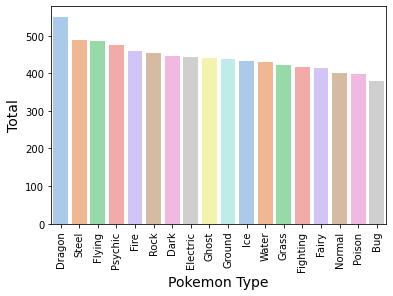

In [28]:
fig, ax = plt.subplots(1, 1)

group_obj = grouped_main['Total'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=pokemon,
            x='Type_1',
            y='Total', palette='pastel',
            ax=ax, ci=None,
            order=group_obj['Type_1'])

xlabels = ax.get_xticklabels()
ax.set_xticklabels(rotation=90, labels=xlabels)
ax.set_xlabel('Pokemon Type', fontsize=14),
ax.set_ylabel('Total', fontsize=14);

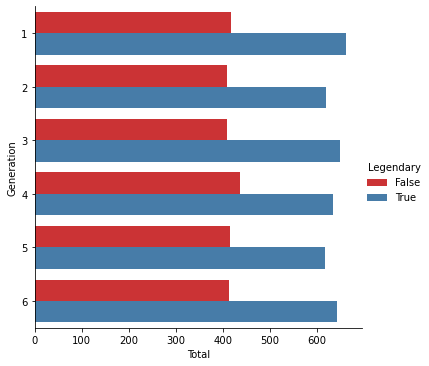

In [29]:
sns.catplot(x='Total', y='Generation',
            hue='Legendary', kind='bar',
            palette='Set1',
            data=pokemon, ci=None);

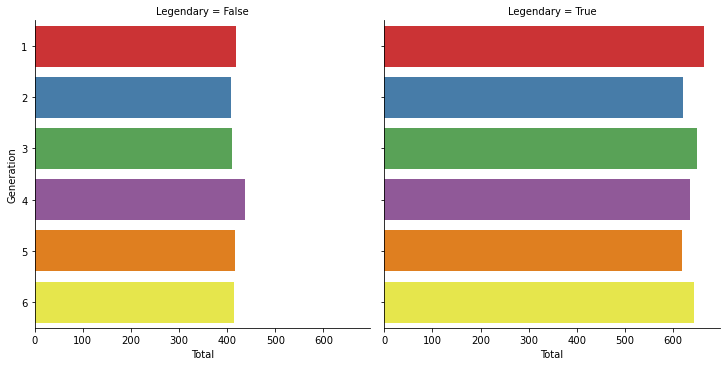

In [30]:
sns.catplot(x='Total', y='Generation',
            col='Legendary', kind='bar',
            palette='Set1',
            data=pokemon, ci=None);

In [31]:
pd.crosstab(pokemon['Generation'], 
            pokemon['Legendary'],
            margins=True)

Legendary,False,True,All
Generation,,,
1,160,6,166
2,101,5,106
3,142,18,160
4,108,13,121
5,150,15,165
6,74,8,82
All,735,65,800


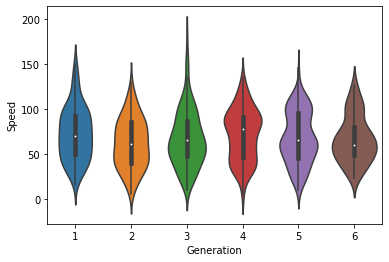

In [32]:
sns.violinplot(data=pokemon, x='Generation', y='Speed');

In [33]:
# groupby multiple columns
grouped_mul = pokemon.groupby(['Type_1', 'Type_2'])

In [34]:
grouped_mul.size()

Type_1  Type_2  
Bug     Bug         17
        Dark         0
        Dragon       0
        Electric     2
        Fairy        0
                    ..
Water   Poison       3
        Psychic      5
        Rock         4
        Steel        1
        Water       59
Length: 324, dtype: int64

In [35]:
grouped_mul['Total'].apply(
    lambda x: x.sort_values(ascending=False)[-1:])

Type_1  Type_2       
Bug     Bug       446    194
        Electric  656    319
        Fighting  231    500
        Fire      697    360
        Flying    462    244
                        ... 
Water   Poison    78     335
        Psychic   85     315
        Rock      625    355
        Steel     440    530
        Water     381    200
Name: Total, Length: 154, dtype: int64

In [36]:
grouped_mul['Total'].apply(lambda x: x.max())

Type_1  Type_2  
Bug     Bug         500.0
        Dark          NaN
        Dragon        NaN
        Electric    472.0
        Fairy         NaN
                    ...  
Water   Poison      515.0
        Psychic     590.0
        Rock        495.0
        Steel       530.0
        Water       770.0
Name: Total, Length: 324, dtype: float64

In [37]:
grouped_mul['Total'].max()

Type_1  Type_2  
Bug     Bug         500.0
        Dark          NaN
        Dragon        NaN
        Electric    472.0
        Fairy         NaN
                    ...  
Water   Poison      515.0
        Psychic     590.0
        Rock        495.0
        Steel       530.0
        Water       770.0
Name: Total, Length: 324, dtype: float64

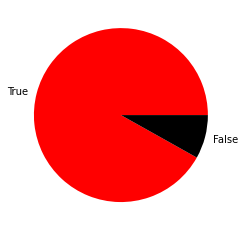

In [38]:
plt.pie(pokemon.groupby('Legendary').size(),
        labels=['True', 'False'], colors=['r', 'k']);